# Lecture 8: Logistic regression

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1NSiPlX-azox9No8o7PgcF4o70bwMUH3A )

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2026-01-09 23:34:07


## Estimating probabilities

Estimate the probability of an instance belonging to a particular class.

Can adapt linear regression algorithm for this purpose to perform *logistic regression*.

### Sigmoid function

Consider linear weighted sum of inputs $\theta^{\rm T} x$ again but then apply sigmoid function $\sigma$:

$$\hat{p} = h_\theta(x) = \sigma(\theta^{\rm T} x), $$

where

$$\sigma(t) = \frac{1}{1+\exp{(-t)}}. $$

#### Plot the sigmoid function

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

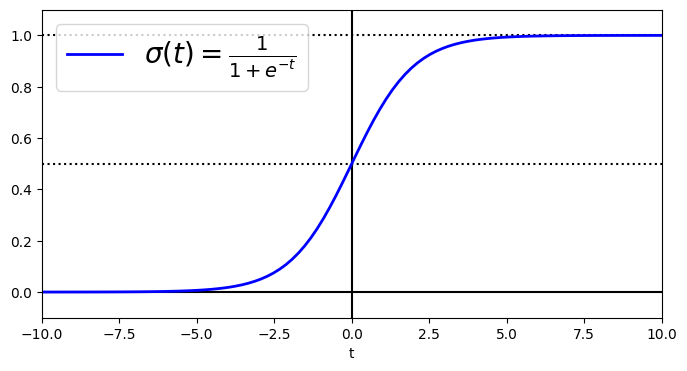

In [3]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(8, 4))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1]);

### Predictions

Can then make class predictions depending on whether the predicted probability $\hat{p}$ is greater than 0.5, i.e.

$$ \hat{y} = \biggl \{
\begin{split}
0,\ \text{if}\ \hat{p} < 0.5\\
1,\ \text{if}\ \hat{p} \geq  0.5
\end{split}
,
$$

where we recall 
$\hat{p} = h_\theta(x) = \sigma(\theta^{\rm T} x) \quad \text{and} \quad \sigma(t) = \frac{1}{1+\exp{(-t)}}.$

Note that $\sigma(t) < 0.5$ when $t<0$ and $\sigma(t) \geq 0.5$ when $t \geq 0$.  

That is, logistic regression predicts model 1 when $\theta^{\rm T} x$ is positive, and model 0 when it is negative.  

The decision boundary is defined by $\theta^{\rm T} x=0$.

## Cost functions

Consider the cost function:

$$ C(\theta) = \biggl \{
\begin{split}
-\log(\hat{p}),\ \text{if}\ y=1\\
-\log(1 - \hat{p}),\ \text{if}\ y=0
\end{split}
.
$$

### Exercise: Plot the cost function for $y=1$ as a function of $\hat{p}$.

Consider the cost function:

$$ C(\theta) = \biggl \{
\begin{split}
-\log(\hat{p}),\ \text{if}\ y=1\\
-\log(1 - \hat{p}),\ \text{if}\ y=0
\end{split}
.
$$

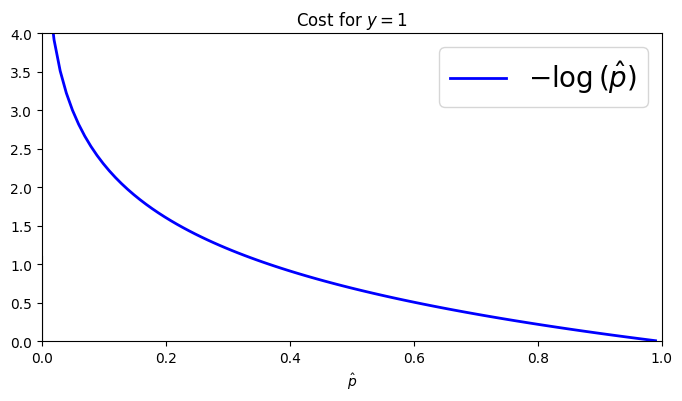

In [4]:
ph = np.linspace(0.01, 0.99, 100)
cost_one = -np.log(ph)
plt.figure(figsize=(8, 4))
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(ph, cost_one, "b-", linewidth=2, label=r"$-\log{(\hat{p})}$")
plt.xlabel("$\hat{p}$")
plt.legend(loc="upper right", fontsize=20)
plt.axis([0, 1, 0, 4]);
plt.title('Cost for $y=1$');

What can you say intuitively about the cost function at the edges of the domain?

- For $\hat{p}=1$, $C(\hat{p}) = 0$.
- For $\hat{p}=0$, $C(\hat{p}) \rightarrow \infty$.

### Exercise: Plot the cost function for $y=0$ as a function of $\hat{p}$.

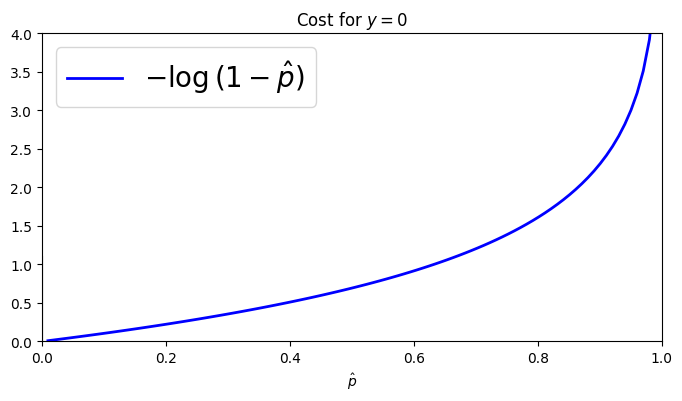

In [5]:
cost_zero = -np.log(1-ph)
plt.figure(figsize=(8, 4))
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(ph, cost_zero, "b-", linewidth=2, label=r"$-\log{(1-\hat{p})}$")
plt.xlabel("$\hat{p}$")
plt.legend(loc="upper left", fontsize=20)
plt.axis([0, 1, 0, 4]);
plt.title('Cost for $y=0$');

What can you say intuitively about the cost function at the edges of the domain?

- For $\hat{p}=0$, $C(\hat{p}) = 0$.
- For $\hat{p}=1$, $C(\hat{p}) \rightarrow \infty$.

### Log-loss function for logistic regression

Cost function can be written by the single expression

$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$

since $y^{(i)}$ is always 0 or 1 and we thus recover the separate cases considered above.

#### Aside: statistical interpretation

Interpret $p$ as probability of target $y$:

$$
{\rm P}(y \: \vert \: p ) = p^{y} (1-p)^{1-y}
$$

$$
{\rm log}{\rm P}(y \: \vert \: p, x ) = y {\rm log}(p) + (1-y) {\rm log}(1-p)
$$

See [MacKay](http://www.inference.org.uk/itila/book.html) [Chapter 41] for further details.

## Minimising the cost function

No closed form solution like linear regression.

But since the cost function is convex guaranteed to find global minimum by gradient descent.

### Derivative of the cost function

\begin{align*}
\frac{\partial C}{\partial \theta} 
&=
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right] 
x^{(i)} \\
&=
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right] \\
&=
\frac{1}{m} 
X^{\rm T}
\left[ h_\theta\left(X\right) - y \right]
\end{align*}



### Similarity with linear regression

Identical to linear regression (up to factor of 2 depending on conventions adopted) but with a different prediction function:

$$h_\theta(x) = \sigma(\theta^{\rm T} x), $$

instead of

$$h_\theta(x) = \theta^{\rm T} x. $$


## Example of logistic regression

Consider [Iris flower data](https://en.wikipedia.org/wiki/Iris_flower_data_set) again.

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Train model

Use petal width to classify whether Virginica or not.

In [8]:
# Set up training data
X_1d = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_1d, y);

Note that Scikit-Learn automatically adds $\ell_2$ regularizer to cost function.

### Prediction

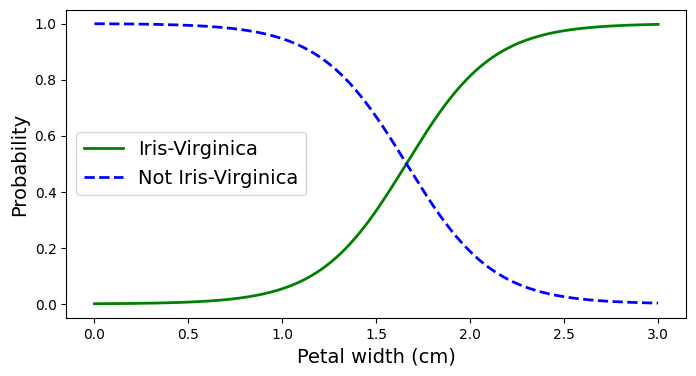

In [10]:
X_1d_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_1d_proba = log_reg.predict_proba(X_1d_new)

plt.figure(figsize=(8,4))
plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14);

### Decision boundary

Recall the decision boundary is given by $\hat{p}=0.5$ or, equivalently, $\theta^{\rm T} x=0$.

In [11]:
decision_boundary = X_1d_new[y_1d_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

#### Updating plot with decision boundary and training data

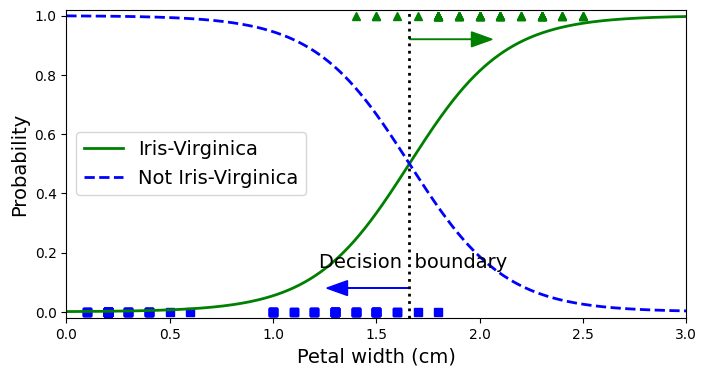

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(X_1d[y==0], y[y==0], "bs")
plt.plot(X_1d[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02]);

Predictions depend on what side of decision boundary fall.

In [13]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*

### Extending to two features

In [14]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
 
C = 1000 # inverse regularization (smaller values correspond to stronger regularization)
log_reg = LogisticRegression(C=C, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

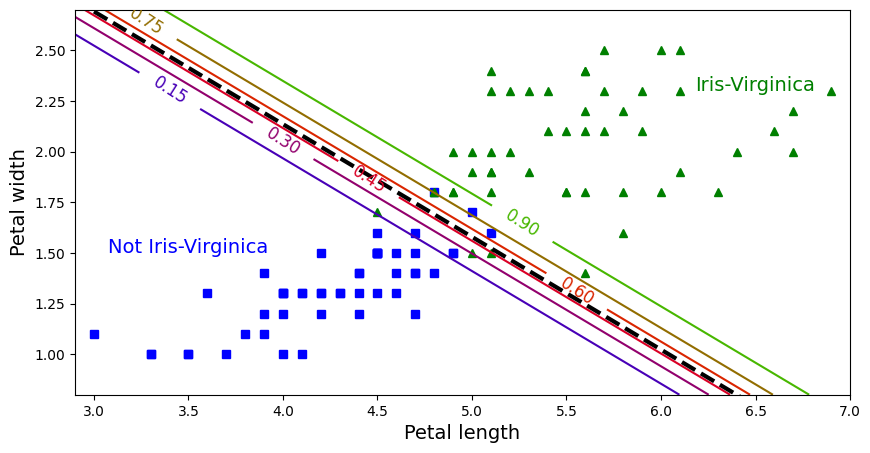

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Solve theta^T x = 0 to determine boundary
left_right = np.array([2.9, 7]) 
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]);

**Exercises:** *You can now complete Exercise 2 in the exercises associated with this lecture.*

## Softmax regression

Can generalise logistic regression to classify multiple classes.

### Softmax score

Consider the softmax score function for class $k$:

$$s_k(x) = \left(\theta^{(k)}\right)^{\rm T} x .$$

**Important note**: each class $k$ has its own score and set of parameters $\theta^{(k)}$, for $K$ classes (i.e. $k=1,\ldots,K$).

Define:
- Parameter matrix: $\Theta_{K \times n} = [ \theta^{(1)},\ \theta^{(2)},\ ...,\ \theta^{(K)}]^{\rm T}$.

### Softmax function

Predictions are then given by the softmax function $\sigma_k(s(x))$ for each $k$:

$$ 
\hat{p}_k = \sigma_k(s(x)) = \frac{\exp\left(s_k(x)\right)}{\sum_{k^\prime=1}^K \exp\left(s_{k^\prime}(x)\right)}
.
$$

Normalised such that
- $\sum_k \hat{p}_k = 1$
- $0 \leq \hat{p}_k \leq 1$

### Predictions

Can then make class predictions based on which class has the highest predicted probability, i.e.

$$  
\hat{y}
= \arg\max_k \hat{p}_k 
= \arg\max_k s_k(x)
= \arg\max_k \left(\theta^{(k)}\right)^{\rm T} x
,
$$

where we recall 
$\hat{p}_k = \sigma_k(s(x)) = \frac{\exp\left(s_k(x)\right)}{\sum_{k^\prime=1}^K \exp\left(s_{k^\prime}(x)\right)}
\quad \text{and} \quad 
s_k(x) = \left(\theta^{(k)}\right)^{\rm T} x.$

### Cost function

Generalization of the logistic regression cost function is given by the *cross-entropy* (measure of similarity of probability distributions):

$$
C(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log \left(\hat{p}_k^{(i)}\right)
.
$$

For the case $K=2$, the cost function reduces to the standard cost function for logistic regression.

### Minimising the cost function

Can solve by gradient descent.

Derivative of cost function given by

$$
\frac{\partial C}{\partial \theta^{(k)}}
= \frac{1}{m} \sum_{i=1}^m \left(\hat{p}_k^{(i)} - y_k^{(i)} \right) x^{(i)} .
$$

### Example of softmax regression

In [16]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"] # consider all three target classes

C = 10
softmax_reg = LogisticRegression(solver="lbfgs", C=C, random_state=42)
softmax_reg.fit(X, y);

In [17]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# Select contours to plot
# zz1 = y_proba[:, 0].reshape(x0.shape)
zz1 = y_proba[:, 1].reshape(x0.shape)
# zz1 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

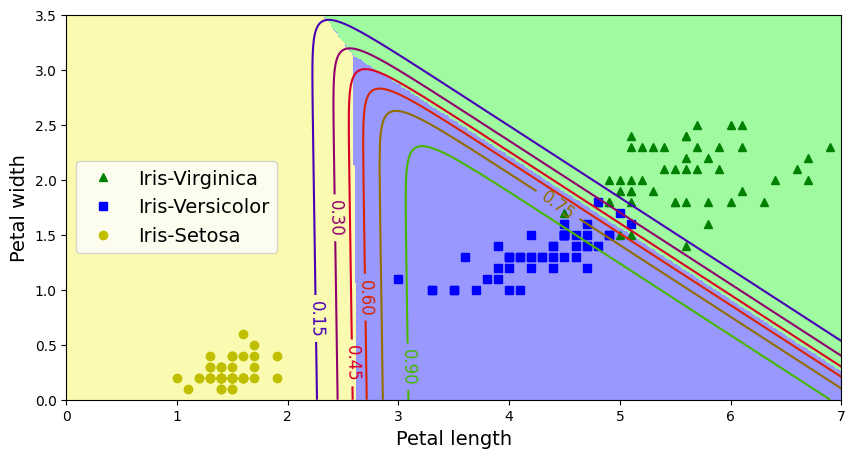

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]);